In [ ]:
# Import Important Libraries
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
import math
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

Data Preprocessing

In [ ]:
#Reading the CSV/dropping null values and used values method 
df = pd.read_csv('winequality-combined.csv')
df1 = df.dropna()
df2 = df1.values


In [ ]:
# Separating Dataset into Features and Target Variables
# X: (First 12 Columns)
# y: (Column 13)
# a-g and j

#X = df1[['fixed acidity','volatile acidity','citric acid',
#'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates']].values
X = df2[:, :11]
y = df2[:, 12]




In [ ]:
#Splitting the data into train/test (80%/20%)
x_scale = preprocessing.scale(X)

x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.20, train_size=0.80)


In [ ]:
#Performing PCA, with 85% explained variance 
pca = PCA(0.85)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

print("Number of components:",pca.n_components_)
print("Explained variance:",pca.explained_variance_ratio_)

Number of components: 6
Explained variance: [0.28920771 0.23101439 0.14245589 0.08619694 0.05990391 0.05199636]


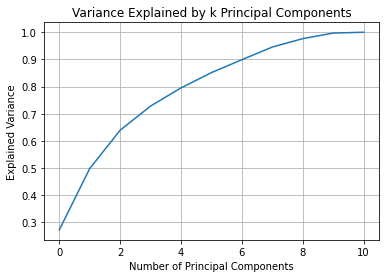

In [ ]:
#Plotting cumulative explained variance with untransformed data
pca_init = PCA().fit(x_train)
plt.plot(np.cumsum(pca_init.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance') #for each component
plt.title('Variance Explained by k Principal Components')
plt.grid()

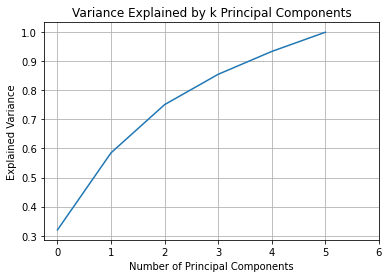

In [ ]:
#Plotting cumulative explained variance with transformed data
pca_transform = PCA().fit(x_train_pca)

plt.plot(np.cumsum(pca_transform.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance') #for each component
plt.title('Variance Explained by k Principal Components')
plt.xticks(range(7))
plt.grid()


In [ ]:
print(x_train.shape)
print(x_train_pca.shape)
#print(pca_x_train)

(5197, 11)
(5197, 6)


In [ ]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
acc_train_ridge = []
acc_test_ridge = []
for c in cVals:
    # Creating Logistic Regression model object with 'l2' regularization
    logreg_l2 = linear_model.LogisticRegression(C = c)

    # Fitting model on training set
    logreg_l2.fit(x_train_pca,y_train)

    # Finding prediction on training set
    yhat_train_l2 = logreg_l2.predict(x_train_pca)

    # Finding training accuracy
    acc_train_l2 = accuracy_score(y_train, yhat_train_l2)
    acc_train_ridge.append(acc_train_l2)
    print("Accuracy on train data with ridge = %f" % acc_train_l2)

print('')

for c in cVals:
    logreg_l2 = linear_model.LogisticRegression(C = c)
    logreg_l2.fit(x_train_pca,y_train)
    # Finding prediction on testing set
    yhat_test_l2 = logreg_l2.predict(x_test_pca)

    # Finding testing accuracy
    acc_test_l2 = accuracy_score(y_test, yhat_test_l2)
    acc_test_ridge.append(acc_test_l2)
    prec, recall ,fscore,_ = precision_recall_fscore_support(y_test,yhat_test_l2,average='binary')
    print(c)
    print("Accuracy on test data with ridge = %f" % acc_test_l2)
    print("Precision:",prec,"\nRecall:",recall,"\nFscore:",fscore)
    

Accuracy on train data with ridge = 0.765442
Accuracy on train data with ridge = 0.968828
Accuracy on train data with ridge = 0.984607
Accuracy on train data with ridge = 0.987108
Accuracy on train data with ridge = 0.986916
Accuracy on train data with ridge = 0.987108
Accuracy on train data with ridge = 0.987108

0.0001
Accuracy on test data with ridge = 0.741538
Precision: 0.7415384615384616 
Recall: 1.0 
Fscore: 0.8515901060070672
0.001
Accuracy on test data with ridge = 0.540769
Precision: 0.6769527483124397 
Recall: 0.7282157676348547 
Fscore: 0.7016491754122938
0.01
Accuracy on test data with ridge = 0.486923
Precision: 0.6535677352637022 
Recall: 0.6556016597510373 
Fscore: 0.6545831175556707
0.1
Accuracy on test data with ridge = 0.470000
Precision: 0.6455026455026455 
Recall: 0.6327800829875518 
Fscore: 0.6390780513357778
1
Accuracy on test data with ridge = 0.468462
Precision: 0.6447507953340403 
Recall: 0.6307053941908713 
Fscore: 0.637650760356581
10
Accuracy on test data w

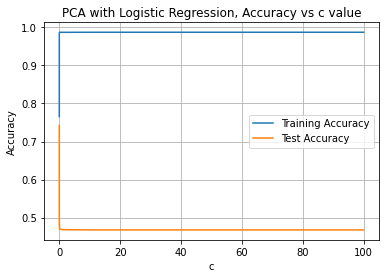

In [ ]:
#Plotting 'training\testing accuracy'(y-axis) VS. 'c'(x-axis)

plt.plot(cVals, acc_train_ridge, cVals, acc_test_ridge)
plt.grid()
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("PCA with Logistic Regression, Accuracy vs c value")

# Including a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='right')

In [ ]:
#Using a linear kernel 
from sklearn import svm
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

acc_train_svm_linear = []
acc_test_svm_linear = []

#train
print("Train Accuracy using a Linear kernel")
for c in cVals: 
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(x_train_pca, y_train)

    yhat_svc_linear_train = svc_linear.predict(x_train_pca)
    acc_train_linear = np.mean(yhat_svc_linear_train == y_train)
    acc_train_svm_linear.append(acc_train_linear)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_linear)
    #print('Train Accuracy = {0:f}'.format(acc_train_linear))

print()

#test
print("Test Accuracy using a Linear kernel")
for c in cVals: 
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(x_train_pca, y_train)
    yhat_svc_linear_test = svc_linear.predict(x_test_pca)
    acc_test_linear = np.mean(yhat_svc_linear_test == y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test_linear)
    prec, recall ,fscore,_ = precision_recall_fscore_support(y_test,yhat_svc_linear_test,average='binary')
    print("Test Accuracy(c=" + str(c) + "):", acc_test_linear)
    print("Precision:",prec,"\nRecall:",recall,"\nFscore:",fscore)
    #print('Test Accuracy = {0:f}'.format(acc_test_linear))
    



Train Accuracy using a Linear kernel
Train Accuracy(c=0.0001): 0.8849336155474312
Train Accuracy(c=0.001): 0.9846065037521647
Train Accuracy(c=0.01): 0.9865306907831441
Train Accuracy(c=0.1): 0.9867231094862421
Train Accuracy(c=1): 0.9867231094862421
Train Accuracy(c=10): 0.9867231094862421
Train Accuracy(c=100): 0.9867231094862421

Test Accuracy using a Linear kernel
Test Accuracy(c=0.0001): 0.6484615384615384
Precision: 0.7150127226463104 
Recall: 0.8744813278008299 
Fscore: 0.7867475501633223
Test Accuracy(c=0.001): 0.48384615384615387
Precision: 0.652128764278297 
Recall: 0.6514522821576764 
Fscore: 0.651790347690711
Test Accuracy(c=0.01): 0.4646153846153846
Precision: 0.6428571428571429 
Recall: 0.6255186721991701 
Fscore: 0.6340694006309149
Test Accuracy(c=0.1): 0.46384615384615385
Precision: 0.6424759871931697 
Recall: 0.6244813278008299 
Fscore: 0.6333508679642295
Test Accuracy(c=1): 0.4623076923076923
Precision: 0.6417112299465241 
Recall: 0.6224066390041494 
Fscore: 0.6319115

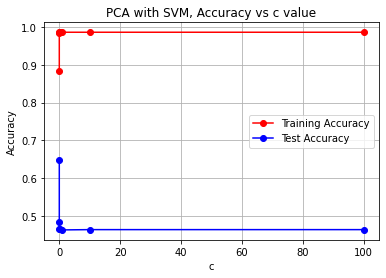

In [ ]:
#Plotting 'training\testing accuracy'(y-axis) VS. 'c'(x-axis)

plt.plot(cVals, acc_train_svm_linear, 'ro-')
plt.plot(cVals, acc_test_svm_linear, 'bo-')

plt.grid()

plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("PCA with SVM, Accuracy vs c value")

# Including a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='right')